In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

In [2]:
# Objective: Understand clustering behavior as data dimensionality increases.
# This often involves observing the impact of the "curse of dimensionality" on clustering algorithms.

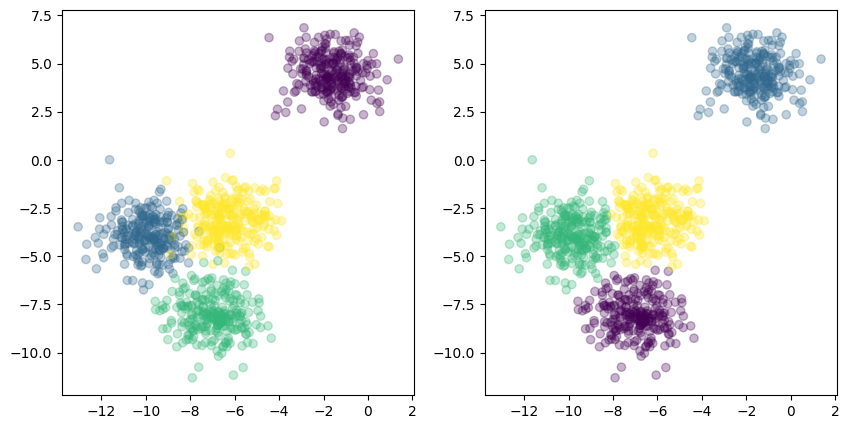

In [3]:
# Generate 2D data.
# This creates a dataset with two features (dimensions) for visualization or initial testing.

X_large, y_large = make_blobs(n_samples=1000,
                  centers=4,
                  cluster_std=1,
                  n_features=2,
                  random_state=1)

kmeans_clust = KMeans(4)
kmeans_clust.fit(X_large)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_large[:, 0], X_large[:, 1], c=y_large, alpha=0.3);
ax2.scatter(X_large[:, 0], X_large[:, 1], c=kmeans_clust.labels_, alpha=0.3);

In [4]:
# Clusters exhibit some overlap, resulting in a non-ideal Rand Index (RI) score.
rand_score(y_large, kmeans_clust.labels_)

np.float64(0.9843543543543544)

In [5]:
# Let's examine how the clustering score changes as dimensionality increases.
dims = [2, 5, 10, 50, 150, 500, 1000]

for dim in dims:
    X_large, y_large = make_blobs(n_samples=10000,
                    centers=4,
                    cluster_std=1,
                    n_features=dim,
                    random_state=1)

    kmeans_clust = KMeans(4)
    kmeans_clust.fit(X_large)

    print(rand_score(y_large, kmeans_clust.labels_))

0.9826431243124313
1.0
1.0
1.0
1.0
1.0
1.0


In [6]:
# The metric consistently improves

In [7]:
# Increase the noise level in the data by setting 'cluster_std' to 3.
dims = [2, 5, 10, 50, 150, 500, 1000]

for dim in dims:
    X_large, y_large = make_blobs(n_samples=10000,
                    centers=4,
                    cluster_std=3,
                    n_features=dim,
                    random_state=1)

    kmeans_clust = KMeans(4)
    kmeans_clust.fit(X_large)

    print(rand_score(y_large, kmeans_clust.labels_))

0.7776466446644664
0.9807625762576258
0.9994006600660066
1.0
1.0
1.0
1.0


In [8]:
# The metric continues to improve (or remains high), even with increased noise.
# In such synthetic datasets, the values tend to average out, effectively mitigating randomness and noise.
# This can mask the true impact of increased dimensionality or noise on clustering performance,
# as the underlying statistical properties (e.g., means of clusters) remain distinct enough for the algorithm.